# Realtime ASR

Let say you want to transcribe realtime recording / input using PyAudio, malaya-speech able to do that.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/realtime-asr](https://github.com/huseinzol05/malaya-speech/tree/master/example/realtime-asr).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import malaya_speech
from malaya_speech import Pipeline
from malaya_speech.utils.astype import float_to_int

Cannot import beam_search_ops from Tensorflow Addons, ['malaya.jawi_rumi.deep_model', 'malaya.phoneme.deep_model', 'malaya.rumi_jawi.deep_model', 'malaya.stem.deep_model'] will not available to use, make sure Tensorflow Addons version >= 0.12.0
check compatible Tensorflow version with Tensorflow Addons at https://github.com/tensorflow/addons/releases
/Users/huseinzolkepli/.pyenv/versions/3.9.4/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
torchaudio.io.StreamReader exception: FFmpeg libraries are not found. Please install FFmpeg.
`torchaudio.io.StreamReader` is not available, `malaya_speech.streaming.torchaudio.stream` is not able to use.
`openai-whisper` is not available, native whisper processor is not available, will use huggingface processor instead.
`torchaudio.io.StreamReader` is not available, `

### Load VAD model

We are going to use WebRTC VAD model, read more about VAD at https://malaya-speech.readthedocs.io/en/latest/load-vad.html

In [2]:
vad_model = malaya_speech.vad.webrtc()

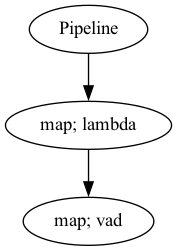

In [3]:
p_vad = Pipeline()
pipeline = (
    p_vad.map(lambda x: float_to_int(x, divide_max_abs=False))
    .map(vad_model)
)
p_vad.visualize()

Starting malaya-speech 1.4.0, streaming always returned a float32 array between -1 and +1 values.

### Streaming interface

```python
def stream(
    vad_model=None,
    asr_model=None,
    classification_model=None,
    sample_rate: int = 16000,
    segment_length: int = 2560,
    num_padding_frames: int = 20,
    ratio: float = 0.75,
    min_length: float = 0.1,
    max_length: float = 10.0,
    realtime_print: bool = True,
    **kwargs,
):
    """
    Stream an audio using pyaudio library.

    Parameters
    ----------
    vad_model: object, optional (default=None)
        vad model / pipeline.
    asr_model: object, optional (default=None)
        ASR model / pipeline, will transcribe each subsamples realtime.
    classification_model: object, optional (default=None)
        classification pipeline, will classify each subsamples realtime.
    device: None, optional (default=None)
        `device` parameter for pyaudio, check available devices from `sounddevice.query_devices()`.
    sample_rate: int, optional (default = 16000)
        output sample rate.
    segment_length: int, optional (default=2560)
        usually derived from asr_model.segment_length * asr_model.hop_length,
        size of audio chunks, actual size in term of second is `segment_length` / `sample_rate`.
    ratio: float, optional (default = 0.75)
        if 75% of the queue is positive, assumed it is a voice activity.
    min_length: float, optional (default=0.1)
        minimum length (second) to accept a subsample.
    max_length: float, optional (default=10.0)
        maximum length (second) to accept a subsample.
    realtime_print: bool, optional (default=True)
        Will print results for ASR.
    **kwargs: vector argument
        vector argument pass to malaya_speech.streaming.pyaudio.Audio interface.

    Returns
    -------
    result : List[dict]
    """
```

### Check available devices

In [4]:
import sounddevice

sounddevice.query_devices()

> 0 MacBook Air Microphone, Core Audio (1 in, 0 out)
< 1 MacBook Air Speakers, Core Audio (0 in, 2 out)

By default it will use `0` index.

### Load ASR model

In [5]:
malaya_speech.stt.transducer.available_pt_transformer()

,Size (MB),malay-malaya,malay-fleur102,Language,singlish
mesolitica/conformer-tiny,38.5,"{'WER': 0.17341180814, 'CER': 0.05957485024}","{'WER': 0.19524478979, 'CER': 0.0830808938}",[malay],NaN
mesolitica/conformer-base,121,"{'WER': 0.122076123261, 'CER': 0.03879606324}","{'WER': 0.1326737206665, 'CER': 0.05032914857}",[malay],NaN
mesolitica/conformer-medium,243,"{'WER': 0.1054817492564, 'CER': 0.0313518992842}","{'WER': 0.1172708897486, 'CER': 0.0431050488}",[malay],NaN
mesolitica/emformer-base,162,"{'WER': 0.175762423786, 'CER': 0.06233919000537}","{'WER': 0.18303839134, 'CER': 0.0773853362}",[malay],NaN
mesolitica/conformer-base-singlish,121,NaN,NaN,[singlish],"{'WER': 0.06517537334361, 'CER': 0.03265430876}"
mesolitica/conformer-medium-mixed,243,"{'WER': 0.111166517935, 'CER': 0.03410958328}","{'WER': 0.108354748, 'CER': 0.037785722}","[malay, singlish]","{'WER': 0.091969755225, 'CER': 0.044627194623}"
mesolitica/conformer-medium-mixed-augmented,243,"{'WER': 0.1015719878, 'CER': 0.0326360923}","{'WER': 0.1103884742, 'CER': 0.0385676182}","[malay, singlish]","{'WER': 0.086342166, 'CER': 0.0413572066}"
mesolitica/conformer-large-mixed-augmented,413,"{'WER': 0.0919852874, 'CER': 0.026612152}","{'WER': 0.103593636, 'CER': 0.036611048}","[malay, singlish]","{'WER': 0.08727157, 'CER': 0.04318735972}"


In [6]:
model = malaya_speech.stt.transducer.pt_transformer(model = 'mesolitica/conformer-medium')

In [7]:
_ = model.eval()

### ASR Pipeline

Feel free to add speech enhancement or any function, but in this example, I just keep it simple.

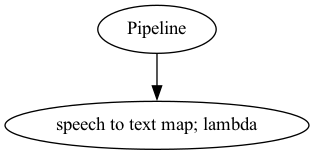

In [8]:
p_asr = Pipeline()
pipeline_asr = (
    p_asr.map(lambda x: model.beam_decoder([x])[0], name = 'speech-to-text')
)
p_asr.visualize()

**You need to make sure the last output should named as `speech-to-text` or else the streaming interface will throw an error**.

### Start Recording

**Again, once you start to run the code below, it will straight away recording your voice**. 

If you run in jupyter notebook, press button stop up there to stop recording, if in terminal, press `CTRL + c`.

In [9]:
samples = malaya_speech.streaming.pyaudio.stream(vad_model = p_vad, asr_model = p_asr,
                                                segment_length = 320)

helo nama saya hussein saya busuk tak suka mandi tiap macam suka makan ayam dan isteri saya sangat busuk  dia tak suka ayam itu masalahnya terima kasih 

In [10]:
samples

[{'wav_data': array([ 0.0007282 ,  0.00219776,  0.00208024, ...,  0.00155422,
         -0.00042624, -0.00223646], dtype=float32),
  'start': 0.0,
  'asr_model': 'helo',
  'end': 3.68},
 {'wav_data': array([-0.00611142, -0.00589947, -0.00219211, ...,  0.01116544,
          0.00946136,  0.00831654], dtype=float32),
  'start': 5.2,
  'asr_model': 'nama saya hussein',
  'end': 7.24},
 {'wav_data': array([ 0.00372992,  0.00254511,  0.0054974 , ..., -0.01673304,
         -0.01337129, -0.00979899], dtype=float32),
  'start': 8.96,
  'asr_model': 'saya busuk',
  'end': 9.780000000000001},
 {'wav_data': array([0.00679095, 0.00291635, 0.00242032, ..., 0.00051756, 0.00035704,
         0.00017065], dtype=float32),
  'start': 11.26,
  'asr_model': 'tak suka mandi',
  'end': 12.32},
 {'wav_data': array([-0.00579788, -0.00428703, -0.0036685 , ..., -0.00599275,
         -0.00840599, -0.01050649], dtype=float32),
  'start': 13.78,
  'asr_model': 'tiap macam',
  'end': 15.28},
 {'wav_data': array([ 0.00

Actually it is pretty nice. As you can see, it able to transcribe realtime, you can try it by yourself.

In [11]:
len(samples)

11

In [12]:
samples[-1]

{'wav_data': array([-0.00284222, -0.00255975, -0.00070129, ..., -0.00597112,
        -0.00702858, -0.00861282], dtype=float32),
 'start': 33.08,
 'asr_model': 'terima kasih',
 'end': 34.28}

In [13]:
import IPython.display as ipd
import numpy as np

In [14]:
ipd.Audio(samples[-1]['wav_data'], rate = 16000)

In [20]:
ipd.Audio(np.concatenate([s['wav_data'] for s in samples[:10]]), rate = 16000)